In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def box_count(traj, box_size):
    min_x, min_y = np.min(traj, axis=0)
    max_x, max_y = np.max(traj, axis=0)
    
    x_bins = int((max_x - min_x) / box_size) + 1
    y_bins = int((max_y - min_y) / box_size) + 1
    
    grid = np.zeros((x_bins, y_bins))
    
    for point in traj:
        x_idx = int((point[0] - min_x) / box_size)
        y_idx = int((point[1] - min_y) / box_size)
        grid[x_idx, y_idx] = 1
    
    box_count = np.sum(grid)
    
    return box_count

In [3]:
def fractal_dimension(traj, box_sizes):
    counts = []
    
    for box_size in box_sizes:
        box_count_result = box_count(traj, box_size)
        counts.append(box_count_result)
    
    # Fit a linear regression model to estimate the fractal dimension
    log_counts = np.log(counts)
    log_scales = np.log(1.0 / np.array(box_sizes))
    
    slope, _ = np.polyfit(log_scales, log_counts, 1)
    
    return -slope

In [4]:
print(traj.shape)

NameError: name 'traj' is not defined

In [40]:
np.random.seed(10)
num_points = 1000
traj = np.cumsum(np.random.randn(num_points, 2), axis=0)

traj[:, 0] =  np.linspace(0, num_points, num_points)
traj[:, 1] = traj[:, 0]

# Define a range of box sizes to consider
box_sizes = [4,3, 2.0, 1.0, 0.5, 0.1]

fractal_dim = fractal_dimension(traj, box_sizes)
print("Fractal Dimension:", fractal_dim)

Fractal Dimension: -0.3732966225842261


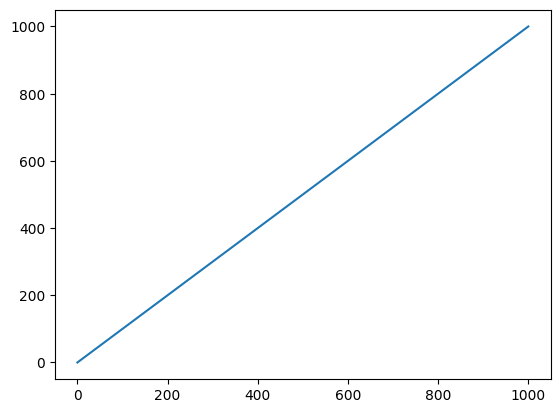

In [41]:
plt.plot(traj[:,0], traj[:,1])

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def fractal_dimension(Z, threshold=0.9):

    # Only for 2d image
    assert(len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z < threshold)
    plt.imshow(Z)
    plt.show()

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

special = [
    'https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Peano_Sierpinski_carpet_4.svg/440px-Peano_Sierpinski_carpet_4.svg.png',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Quadratic_Koch_2.svg/2880px-Quadratic_Koch_2.svg.png',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Quadratic_Koch.svg/300px-Quadratic_Koch.svg.png'
]
images = [
    'https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Peano_Sierpinski_carpet_4.svg/440px-Peano_Sierpinski_carpet_4.svg.png',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Sierpinski_carpet_3.svg/244px-Sierpinski_carpet_3.svg.png',
    'https://upload.wikimedia.org/wikipedia/commons/f/f0/Flocke.PNG',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Quadratic_Koch_2.svg/2880px-Quadratic_Koch_2.svg.png',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Quadratic_Koch.svg/300px-Quadratic_Koch.svg.png'
]

dimensions = [(np.log(3)/np.log(2)), (np.log(3)/np.log(2)), (np.log(4)/np.log(3)), 1.46, 1.5]


for dim, im in zip(dimensions, images):
    # load im
    x = plt.imread(im)
    if im in special:
        print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(x[:,:,3], threshold=0.2))
        print("theoretical:        ", dim)
        print(f"min {x[:,:,3].min()} and max {x[:,:,3].max()} in the array/image")
        
    else:
        print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(x[:,:,1],threshold=0.2))
        print("theoretical:        ", dim)
        print(f"min {x[:,:,1].min()} and max {x[:,:,1].max()} in the array/image")

ValueError: Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.

In [45]:
import PIL
import urllib

In [51]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Peano_Sierpinski_carpet_4.svg/440px-Peano_Sierpinski_carpet_4.svg.png'
im = PIL.Image.open(urllib.request.urlopen(url))

In [58]:
print(np.array(im).shape)

(440, 440, 2)


In [55]:
im.show()

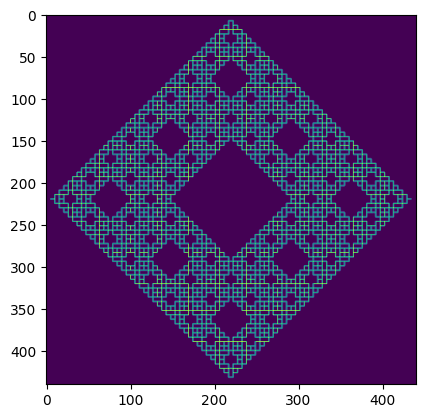

In [62]:
plt.imshow(np.array(im)[:, :, 1])

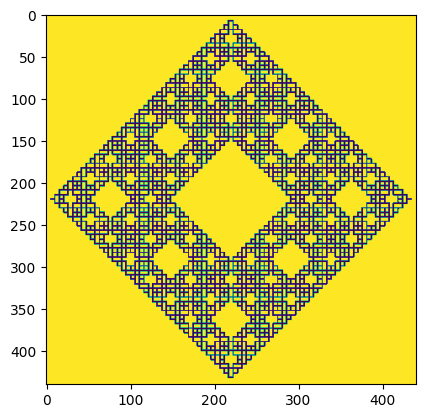

1.64924854831286

In [65]:
fractal_dimension(np.array(im)[:, :, 1])

In [66]:
import scipy.misc
import numpy as np


def fractal_dimension(Z, threshold=0.9):

    # Only for 2d image
    assert(len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

I = scipy.misc.imread("sierpinski.png")/256.0
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))
print("Haussdorf dimension (theoretical):        ", (np.log(3)/np.log(2)))

AttributeError: scipy.misc is deprecated and has no attribute imread.

In [ ]:
from tqdm import tqdm

def getFractal_dim1(traj:np.array, precision:list = [10, 100, 500, 1000])->float:
    """ 
    Fnn
    """

    ## limits of the mesh

    minX = np.min(traj[:, 0])
    maxX = np.max(traj[:, 0])
    minY = np.min(traj[:, 1])
    maxY = np.max(traj[:, 1])

    nbSquare = []       # list with the nb of squares for all the precisions

    for nPrecision in precision:
        ## mesh
        x = np.linspace(minX, maxX, (maxX - minX) // nPrecision)
        y = np.linspace(minY, maxY, (maxY - minY) // nPrecision)

        ## compute the number of square that we went through

        

        

In [67]:
import turtle


def koch_curve(turtle, order, length):
    if order == 0:
        turtle.forward(length)
    else:
        length /= 3.0
        koch_curve(turtle, order - 1, length)
        turtle.left(60)
        koch_curve(turtle, order - 1, length)
        turtle.right(120)
        koch_curve(turtle, order - 1, length)
        turtle.left(60)
        koch_curve(turtle, order - 1, length)

def draw_koch_curve(order, length):
    screen = turtle.Screen()
    screen.title(f"Koch Curve (Order {order})")
    screen.setup(800, 600)

    koch_turtle = turtle.Turtle()
    koch_turtle.penup()
    koch_turtle.goto(-length * 1.5, 0)
    koch_turtle.pendown()

    for _ in range(3):
        koch_curve(koch_turtle, order, length)
        koch_turtle.right(120)

    koch_turtle.hideturtle()
    screen.mainloop()



order = 4  # Change the order to the desired level of detail
length = 300  # Change the length to adjust the size of the curve
draw_koch_curve(order, length)



KeyboardInterrupt



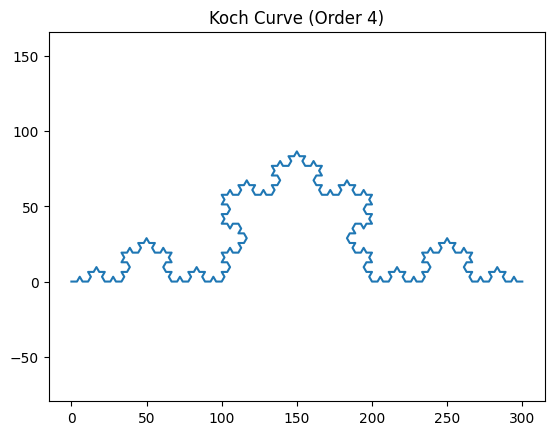

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def koch_curve(order, length):
    if order == 0:
        return [0], [0]
    
    x, y = [], []

    def _koch_segment(p0, p3, depth):
        if depth == 0:
            x.extend([p0[0], p3[0]])
            y.extend([p0[1], p3[1]])
        else:
            p1 = p0 + (p3 - p0) / 3
            p2 = p0 + 2 * (p3 - p0) / 3
            p1_ = p1 + rotate(p2 - p1, np.pi / 3)
            _koch_segment(p0, p1, depth - 1)
            _koch_segment(p1, p1_, depth - 1)
            _koch_segment(p1_, p2, depth - 1)
            _koch_segment(p2, p3, depth - 1)

    p0 = np.array([0, 0])
    p3 = np.array([length, 0])
    _koch_segment(p0, p3, order)

    return x, y

def rotate(vector, angle):
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    return np.dot(rotation_matrix, vector)

def plot_koch_curve(order, length):
    x, y = koch_curve(order, length)
    plt.plot(x, y)
    plt.axis('equal')
    plt.title(f'Koch Curve (Order {order})')
    plt.show()

    return x, y


order = 4  # Change the order to the desired level of detail
length = 300  # Change the length to adjust the size of the curve
x, y = plot_koch_curve(order, length)




Total Length of Trajectory: 948.15
Estimated Fractal Dimension: -2.00


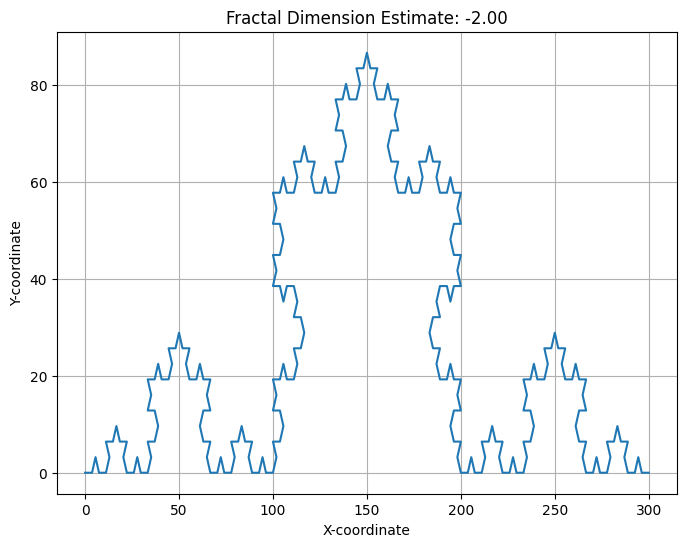

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_trajectory_length(x, y):
    """Calculate the total length of the trajectory."""
    dx = np.diff(x)
    dy = np.diff(y)
    segment_lengths = np.sqrt(dx**2 + dy**2)
    total_length = np.sum(segment_lengths)
    return total_length

def box_counting(trajectory, box_size):
    """Perform box counting on the trajectory."""
    min_x, max_x = min(trajectory[0]), max(trajectory[0])
    min_y, max_y = min(trajectory[1]), max(trajectory[1])
    
    num_x_boxes = int((max_x - min_x) / box_size) + 1
    num_y_boxes = int((max_y - min_y) / box_size) + 1
    
    box_counts = np.zeros((num_x_boxes, num_y_boxes), dtype=int)
    
    for i in range(len(trajectory[0])):
        x_index = int((trajectory[0][i] - min_x) / box_size)
        y_index = int((trajectory[1][i] - min_y) / box_size)
        box_counts[x_index, y_index] += 1
    
    return box_counts

def estimate_fractal_dimension(box_counts, box_size):
    """Estimate the fractal dimension using the box counting results."""
    num_boxes = np.sum(box_counts > 0)
    box_count_ratio = num_boxes / ((box_counts.shape[0] * box_counts.shape[1]) * (1 / box_size**2))
    fractal_dimension = -np.log(box_count_ratio) / np.log(box_size)
    return fractal_dimension

# Generate or load your trajectory data as arrays of x and y coordinates
# Example: Replace these with your actual trajectory data
x_trajectory = np.random.rand(1000)
y_trajectory = np.cumsum(np.random.randn(1000))

trajectory = (x, y)

# Define the box size for box counting
box_size = 100

# Calculate the total length of the trajectory
total_length = calculate_trajectory_length(*trajectory)

# Perform box counting on the trajectory
box_counts = box_counting(trajectory, box_size)

# Estimate the fractal dimension
fractal_dimension = estimate_fractal_dimension(box_counts, box_size)

print(f"Total Length of Trajectory: {total_length:.2f}")
print(f"Estimated Fractal Dimension: {fractal_dimension:.2f}")

# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(*trajectory)
plt.title(f"Fractal Dimension Estimate: {fractal_dimension:.2f}")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.grid(True)
plt.show()


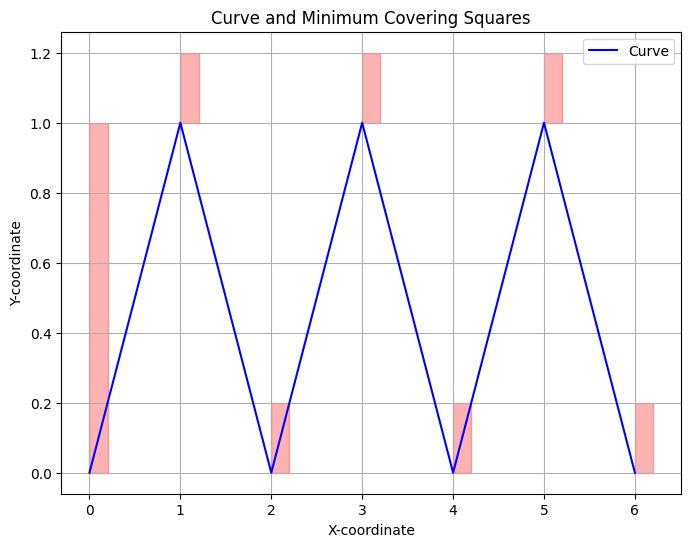

In [87]:
import numpy as np
import matplotlib.pyplot as plt

def find_minimum_covering_squares(curve, square_size):
    squares = []

    # Sort the curve by x-coordinate
    curve.sort(key=lambda point: point[0])

    # Initialize the first square
    current_square = {"x_min": curve[0][0], "x_max": curve[0][0] + square_size,
                      "y_min": min(point[1] for point in curve),
                      "y_max": max(point[1] for point in curve)}

    for point in curve:
        x, y = point

        # Check if the current point is outside the current square
        if x < current_square["x_min"] or x > current_square["x_max"] or \
           y < current_square["y_min"] or y > current_square["y_max"]:
            # If outside, add the current square and create a new square
            squares.append(current_square)
            current_square = {"x_min": x, "x_max": x + square_size,
                              "y_min": y, "y_max": y + square_size}
        else:
            # If inside, update the current square's boundaries
            current_square["x_min"] = min(current_square["x_min"], x)
            current_square["x_max"] = max(current_square["x_max"], x)
            current_square["y_min"] = min(current_square["y_min"], y)
            current_square["y_max"] = max(current_square["y_max"], y)

    # Add the last square to the list
    squares.append(current_square)

    return squares

def plot_curve_and_squares(curve, squares):
    # Extract x and y coordinates from the curve
    x_curve, y_curve = zip(*curve)

    # Plot the curve
    plt.figure(figsize=(8, 6))
    plt.plot(x_curve, y_curve, label="Curve", color='blue')

    # Plot the squares
    for square in squares:
        x_min, x_max, y_min, y_max = square["x_min"], square["x_max"], square["y_min"], square["y_max"]
        plt.fill([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], alpha=0.3, color='red')

    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.title("Curve and Minimum Covering Squares")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Define the curve as a list of (x, y) points
    curve = [(0, 0), (1, 1), (2, 0), (3, 1), (4, 0), (5, 1), (6, 0)]

    # Define the size of the squares
    square_size = 0.2

    # Find the minimum covering squares
    minimum_covering_squares = find_minimum_covering_squares(curve, square_size)

    # Plot the curve and minimum covering squares
    plot_curve_and_squares(curve, minimum_covering_squares)


2.5 1
-3.5 5
0 2.6666666666666665
5 -0.6666666666666666
[False False  True False]
[False False  True False]
[[0.        ]
 [2.66666667]]


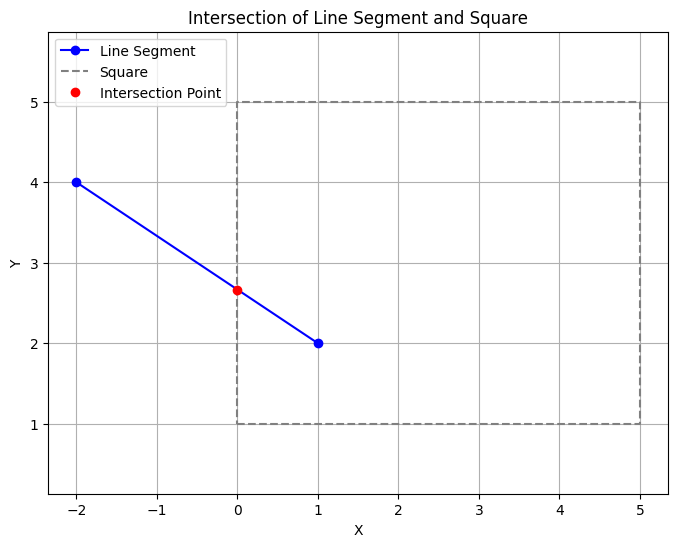

In [187]:
def findInter(x0: float, y0:float, x1:float, y1:float, X0:float, X1:float, Y0:float, Y1:float)->np.array:
    """ 
    
    """

    # linear interpolation for piecewise linear polynomial
    deltaX = x1 - x0
    deltaY = y1 - y0

    if deltaX == 0:
        deltaX = 1e-6
    if deltaY == 0:
        deltaY = 1e-6

    coef0 = deltaY/deltaX       # slope  (Dy/Dx)
    coef1 = 1/coef0             # inverse of slope  (Dx/Dy)


    b = y0 - coef0 * x0
    c = x0 - coef1 * y0

    ## get the intersection with current square
    limX0 = (Y0 - b) * coef1           # (limX0, Y0)   
    limX1 = (Y1 - b) * coef1           # (limX1, Y1)  

    limY0 = (X0 - c) * coef0           # (X0, limY0)  
    limY1 = (X1 - c) * coef0           # (X1, limY1)  


    ar = np.array([[limX0, limX1, X0, X1], [Y0, Y1, limY0, limY1]])


    if x1 > x0:
        ## pt x > x0 et <x1
        x_condition = (ar[0, :] >= x0) & (ar[0, :] <= x1)
    else:
        ## pt x> x1  et <x0
        x_condition = (ar[0, :] >= x1) & (ar[0, :] <= x0)

    if y1 > y0:
        ## pt y > y0 et < y1
        y_condition = (ar[1, :] >= y0) & (ar[1, :] <= y1)
    else:
        ## pt y < y1 et > y0
        y_condition = (ar[1, :] >= y1) & (ar[1, :] <= y0)


    if not any(x_condition):
        return ar[:, y_condition]
    
    if not any(y_condition):
        return ar[:, x_condition]

    res = ar[:, x_condition & y_condition]

    if res.shape[1] > 1:
        pt0 = np.array([x0, y0]).reshape(-1,1)
        ind = np.argmin(np.linalg.norm(res - pt0))
        res = res[:, ind]

    return res
    

x1, y1 = -2, 4
X0, X1, Y0, Y1 = 0, 5, 1, 5

# Find intersection point
intersection = findInter(x0, y0, x1, y1, X0, X1, Y0, Y1)
print(intersection)

# Plot the points and the intersection
plt.figure(figsize=(8, 6))
plt.plot([x0, x1], [y0, y1], label="Line Segment", marker='o', color='blue')
plt.plot([X0, X1, X1, X0, X0], [Y0, Y0, Y1, Y1, Y0], label="Square", linestyle='--', color='gray')
plt.plot(intersection[0], intersection[1], 'ro', label="Intersection Point")

# Annotate the intersection point
#plt.annotate(f'({intersection[0]:.2f}, {intersection[1]:.2f})', xy=(intersection[0], intersection[1]),
#             xytext=(-30, 10), textcoords='offset points', fontsize=12)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Intersection of Line Segment and Square")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [181]:
c = np.array([1, False, False])
if not any(c):
    print("nfjds")

In [144]:
a = np.array([[0.25,       3.25,       0.,         5.        ],
 [1.,         5. ,        0.66666667, 7.33333333]] )

pt1 = np.array([x1, y1]).reshape(-1,1)
pt0 = np.array([x0, y0]).reshape(-1,1)

d1 = np.linalg.norm(a - pt1, axis = 0)
print(d1)

inds = np.argsort(d1)[:2]

ar2 = a[:, inds]

print(ar2)

i = np.argmin(np.linalg.norm(ar2 - pt0, axis = 0))



[6.25       1.25       6.66666666 1.66666666]
[[3.25       5.        ]
 [5.         7.33333333]]


In [3]:
import numpy as np

def create_mesh(x_min, x_max, y_min, y_max, square_size):
    """
    Create a mesh of squares within the specified boundaries.

    Parameters:
        x_min (float): Minimum x-coordinate of the boundary.
        x_max (float): Maximum x-coordinate of the boundary.
        y_min (float): Minimum y-coordinate of the boundary.
        y_max (float): Maximum y-coordinate of the boundary.
        square_size (float): Size of each square.

    Returns:
        list: A list of dictionaries representing squares with their coordinates.
    """
    squares = []
    x_values = np.arange(x_min, x_max, square_size)
    y_values = np.arange(y_min, y_max, square_size)

    for x in x_values:
        for y in y_values:
            square = {
                'x0': x,
                'x1': x + square_size,
                'y0': y,
                'y1': y + square_size,
                'traveled': False
            }
            squares.append(square)

    return squares

def track_trajectory(trajectory, squares):
    """
    Track a trajectory within the mesh of squares.

    Parameters:
        trajectory (list of tuples): List of (x, y) coordinates representing the trajectory.
        squares (list of dictionaries): List of squares generated by create_mesh.

    Returns:
        dict: A dictionary containing squares that were traveled, marked with 'traveled': True.
    """
    traveled_squares = {}

    for point in trajectory:
        x, y = point

        for square in squares:
            if square['x0'] <= x <= square['x1'] and square['y0'] <= y <= square['y1']:
                square['traveled'] = True
                traveled_squares[(square['x0'], square['y0'])] = square

    return traveled_squares

# Example usage:
x_min, x_max = 0, 10
y_min, y_max = 0, 10
square_size = 2

# Create the mesh of squares
squares = create_mesh(x_min, x_max, y_min, y_max, square_size)

# Simulate a trajectory
trajectory = [(1, 1), (2, 2), (4, 4), (6, 6)]

# Track the trajectory within the squares
traveled_squares = track_trajectory(trajectory, squares)

# Print the squares that were traveled
for key, square in traveled_squares.items():
    print(f'Square at ({key[0]}, {key[1]}) was traveled: {square["traveled"]}')


Square at (0, 0) was traveled: True
Square at (0, 2) was traveled: True
Square at (2, 0) was traveled: True
Square at (2, 2) was traveled: True
Square at (2, 4) was traveled: True
Square at (4, 2) was traveled: True
Square at (4, 4) was traveled: True
Square at (4, 6) was traveled: True
Square at (6, 4) was traveled: True
Square at (6, 6) was traveled: True


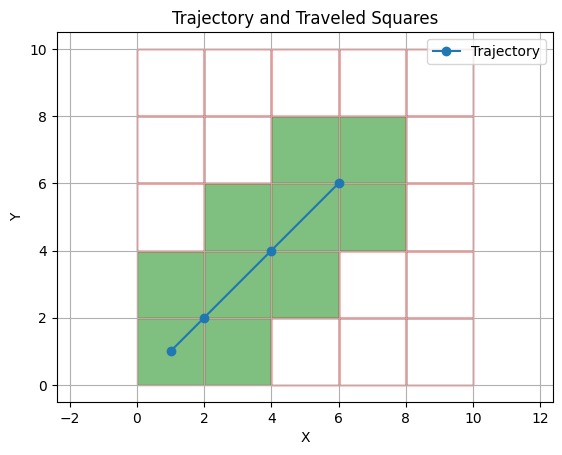

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def display_trajectory_and_squares(trajectory, squares):
    """
    Display the trajectory and colorize the squares that were traveled.

    Parameters:
        trajectory (list of tuples): List of (x, y) coordinates representing the trajectory.
        squares (list of dictionaries): List of squares generated by create_mesh.
    """
    fig, ax = plt.subplots()

    # Plot the trajectory
    x_trajectory, y_trajectory = zip(*trajectory)
    ax.plot(x_trajectory, y_trajectory, label='Trajectory', marker='o', linestyle='-')

    # Plot the squares and colorize the traveled squares
    for square in squares:
        x0, y0, x1, y1 = square['x0'], square['y0'], square['x1'], square['y1']
        rect = Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=1, edgecolor='r', facecolor='none')

        if square['traveled']:
            # Colorize traveled squares
            rect.set_facecolor('green')
            rect.set_alpha(0.5)  # Adjust transparency for colorized squares

        ax.add_patch(rect)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Trajectory and Traveled Squares')
    ax.legend()
    ax.grid(True)
    plt.axis('equal')
    plt.show()

# Example usage:
x_min, x_max = 0, 10
y_min, y_max = 0, 10
square_size = 2

# Create the mesh of squares
squares = create_mesh(x_min, x_max, y_min, y_max, square_size)

# Simulate a trajectory
trajectory = [(1, 1), (2, 2), (4, 4), (6, 6)]

# Track the trajectory within the squares
traveled_squares = track_trajectory(trajectory, squares)

# Display the trajectory and colorized traveled squares
display_trajectory_and_squares(trajectory, squares)


  0%|          | 0/4 [00:00<?, ?it/s]

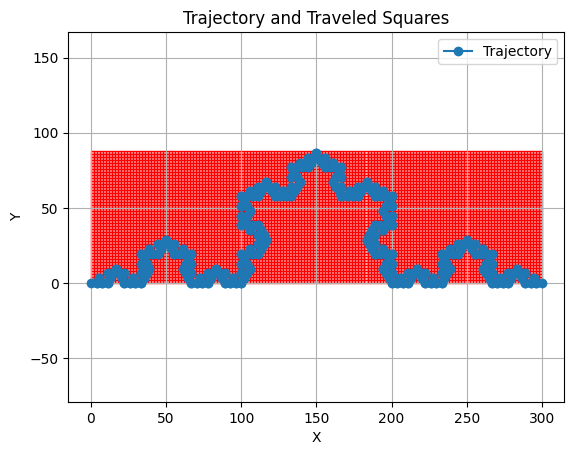

 25%|██▌       | 1/4 [00:11<00:34, 11.64s/it]

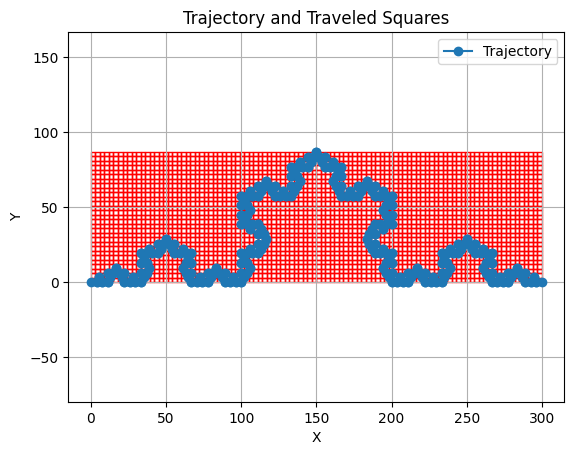

 50%|█████     | 2/4 [00:16<00:15,  7.94s/it]

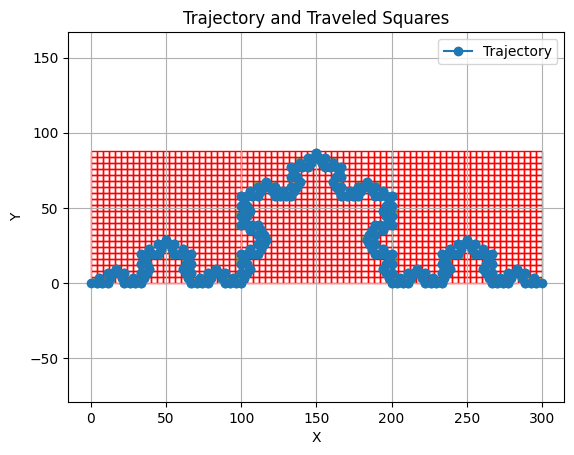

 75%|███████▌  | 3/4 [00:20<00:05,  5.79s/it]

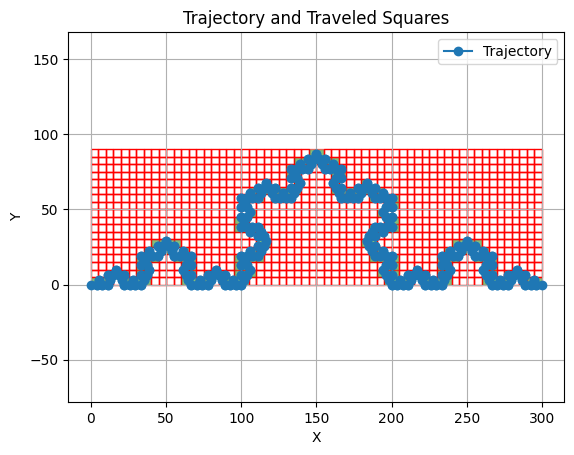

100%|██████████| 4/4 [00:22<00:00,  5.52s/it]


In [5]:
from tqdm import tqdm

combined_list = list(zip(x, y))

xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

l =[2, 3, 4, 5]
v = []
for nl in tqdm(l):
    squares = create_mesh(xmin, xmax, ymin, ymax, nl)
    traveled_squares = track_trajectory(combined_list, squares)
    display_trajectory_and_squares(combined_list, squares)
    v.append(len(traveled_squares))


In [6]:
L = np.array([l[-1] / (l[i]) for i in range(len(l))])

for i in range(len(v)):
    print(np.log(v[i]) / np.log(L[i]))

6.117929464188784
10.870558027185865
24.130184498171534
inf


C:\Users\jepi1\AppData\Local\Temp\ipykernel_2844\1577999073.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  print(np.log(v[i]) / np.log(L[i]))


In [7]:
for i in range(len(L)-1):
    print((np.log(v[i+1]) - np.log(v[i])) / (np.log(L[i+1]) - np.log(L[i])))

0.1303255947741965
0.5855927020296519
0.8583631961166215


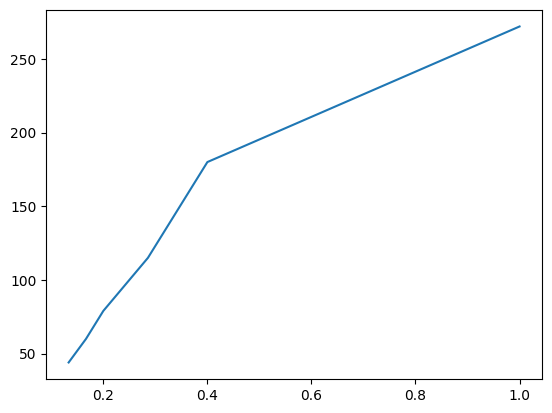

In [212]:
plt.plot(L, v)

In [214]:
print(np.log(v) / np.log(L))

[        inf -5.66736809 -3.78757375 -2.7148906  -2.28509721 -1.87810013]


C:\Users\jepi1\AppData\Local\Temp\ipykernel_40604\3589718149.py:1: RuntimeWarning: divide by zero encountered in divide
  print(np.log(v) / np.log(L))


  0%|          | 0/4 [00:00<?, ?it/s]

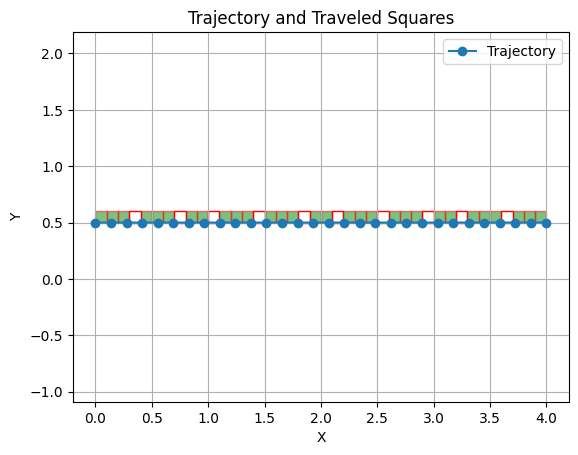

 25%|██▌       | 1/4 [00:00<00:02,  1.50it/s]

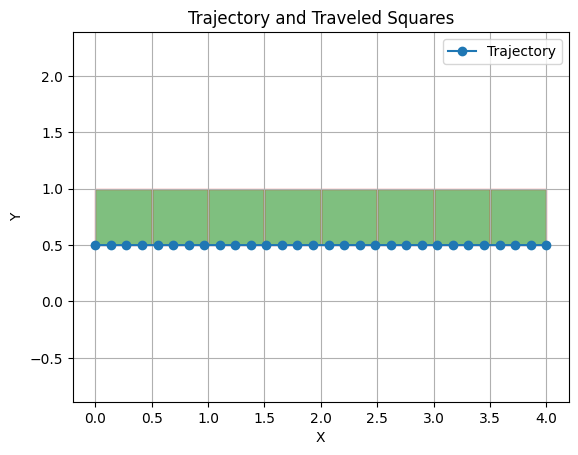

 50%|█████     | 2/4 [00:00<00:00,  2.15it/s]

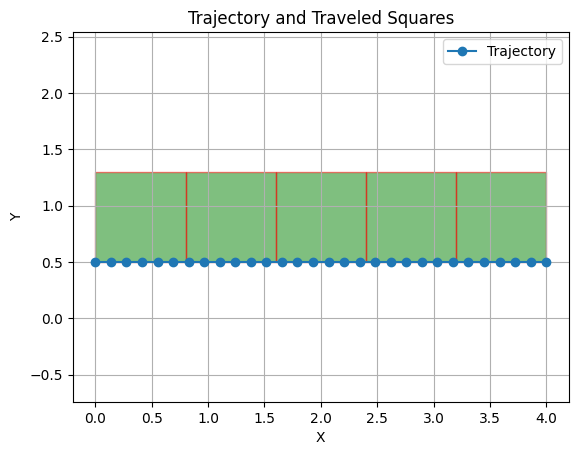

 75%|███████▌  | 3/4 [00:01<00:00,  2.81it/s]

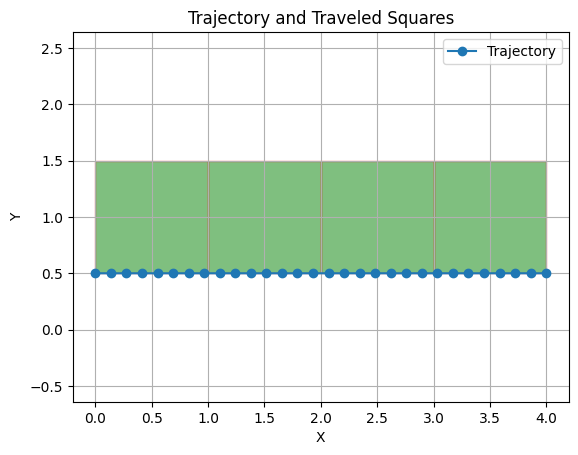

100%|██████████| 4/4 [00:01<00:00,  2.81it/s]


In [246]:
t1 = np.linspace(0, 4, 30)
t2 = np.linspace(0.5,0.5+0.0001,30)

from tqdm import tqdm

combined_list = list(zip(t1, t2))

xmin = np.min(t1)
xmax = np.max(t1)
ymin = np.min(t2)
ymax = np.max(t2)

l =[0.1, 0.5, 0.8, 1]
v = []
for nl in tqdm(l):
    squares = create_mesh(xmin, xmax, ymin, ymax, nl)
    traveled_squares = track_trajectory(combined_list, squares)
    display_trajectory_and_squares(combined_list, squares)
    v.append(len(traveled_squares))


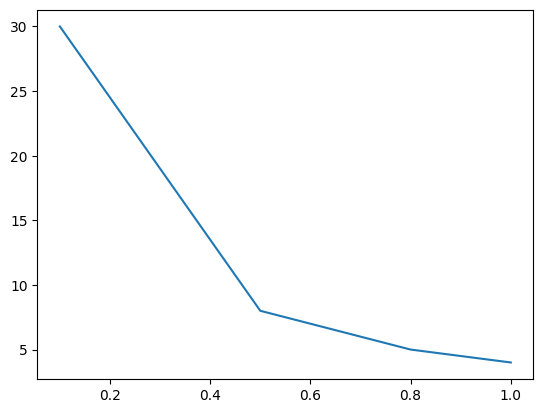

In [247]:
plt.plot(l, v)

In [248]:
L = np.array([l[-1] / (l[i]) for i in range(len(l))])

for i in range(len(v)):
    print(np.log(v[i]) / np.log(L[i]))

1.4771212547196624
3.0
7.212567439010779
inf


C:\Users\jepi1\AppData\Local\Temp\ipykernel_40604\1577999073.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  print(np.log(v[i]) / np.log(L[i]))


In [249]:
print(L)
print(np.log(v) / np.log(L))

[10.    2.    1.25  1.  ]
[1.47712125 3.         7.21256744        inf]


C:\Users\jepi1\AppData\Local\Temp\ipykernel_40604\3977267196.py:2: RuntimeWarning: divide by zero encountered in divide
  print(np.log(v) / np.log(L))


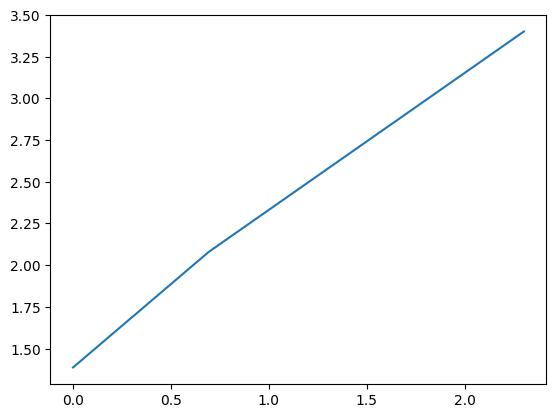

In [250]:
plt.plot(np.log(L), np.log(v))

In [251]:
for i in range(len(L)-1):
    print((np.log(v[i+1]) - np.log(v[i])) / (np.log(L[i+1]) - np.log(L[i])))

0.8212530783391992
0.9999999999999999
0.9999999999999998
